# EARLY DETECTION AND PREVENTION OF HEART DISEASE

##Introduction
Cardiovascular diseases are illnesses that affect the heart and blood vessels. They include conditions like heart attacks, high blood pressure, heart failure, and strokes. These diseases are one of the main causes of death worldwide, so understanding them is very important for preventing and treating them.

This project uses machine learning to analyze a dataset containing patient health information. The dataset includes various features, such as age, blood pressure, cholesterol levels, smoking habits, and medical history. By applying machine learning, the project aims to:
1. Find patterns or connections between different health factors and the presence of cardiovascular disease.
2. Build a predictive model to help detect the risk of cardiovascular disease based on patient data.
3. Provide insights that can be used to prevent and manage these diseases.

The dataset were taken from kaggle website
https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset

This dataset contain 14 columns and 1001 rows of data

The variables are :
- PatientID
- Age
- Gender
- Chest Pain Type
- Resting Blood Pressure
- Serum Cholesterol
- Fasting Blood Sugar
- Resting ECG Results
- Maximum Heart Rate Achieved
- Exercise-Induced Angina
- Oldpeak
- Slope
- Number of Major Vessels
- Target


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
f = open('Cardiovascular_Disease_Dataset.csv')
df = pd.read_csv(f)
df

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


<Axes: >

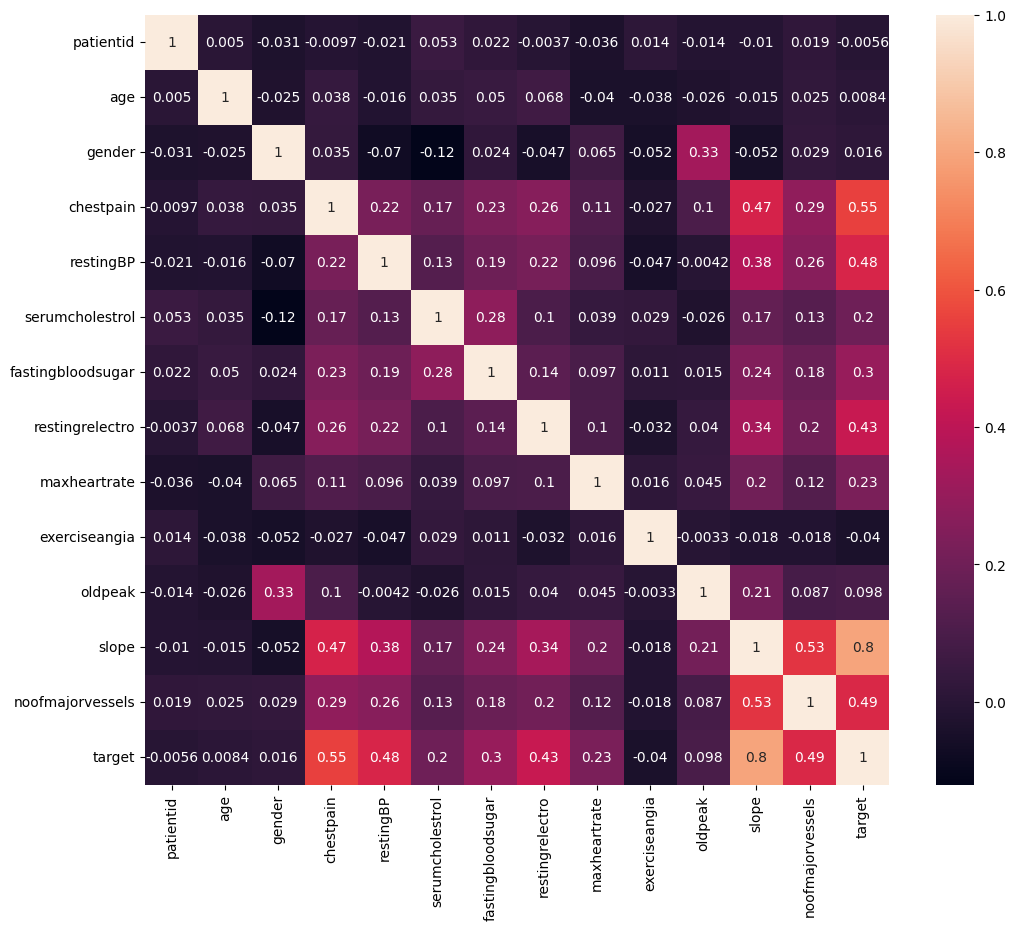

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

## Feature Engineering



###Data Cleaning

In [ ]:
df = df.drop(columns=['patientid', 'gender'])

In [ ]:
# Memeriksa jumlah missing value
total_missing = df.isnull().sum()
total_missing

,0
age,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0
oldpeak,0
slope,0


In [ ]:
# Memeriksa jumlah duplicated values
df.duplicated().sum()

0

In [ ]:
# Print nama kolom
df.columns

Index(['age', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar',
       'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope',
       'noofmajorvessels', 'target'],
      dtype='object')

In [ ]:
# Memeriksa konsistensi tipe data
df.dtypes

,0
age,int64
chestpain,int64
restingBP,int64
serumcholestrol,int64
fastingbloodsugar,int64
restingrelectro,int64
maxheartrate,int64
exerciseangia,int64
oldpeak,float64
slope,int64


Correlation plot shows the relation between each variables with the range between 0 to 1. The attribute 'target', which represents the outcome, has a high correlation with attributes chestpain (0.55), restingBP (0.48), restingrelectro (0.43), slope (0.8), and noofmajorvessels (0.49). While it shows that the other attributes have a lower correlation, some of them are even less than 0.1.

The attribute 'slope' has the highest correlation on target/outcome with 0.8 out of 1, meaning that it has a big impact on determining the target.

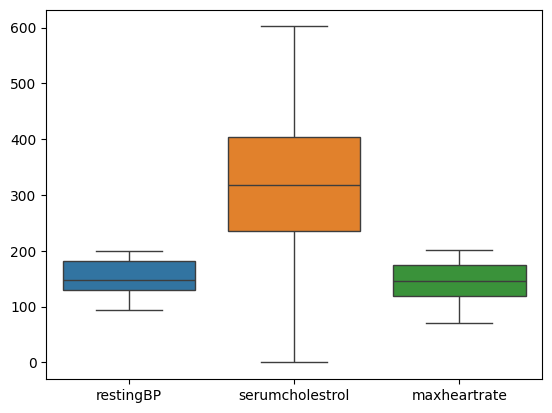

In [ ]:
# Memeriksa adanya outliers untuk variabel
sns.boxplot(data=df[['restingBP', 'serumcholestrol', 'maxheartrate']])
plt.show()

The three variables have very different ranges:
- RestingBP (blue) is between 80 and 200.
- Serumcholesterol (orange) is much larger, going up to 600.
- Maxheartrate (green) is smaller and tightly packed, similar to restingBP but with a lower range.

Problem: The difference in ranges means that the variable with the largest value (serumcholesterol) will dominate when used in machine learning, make the evaluation not ideal. The three of them are in a very different scale which makes it much more complex when modelling, and is harder to see the relation between each variable.

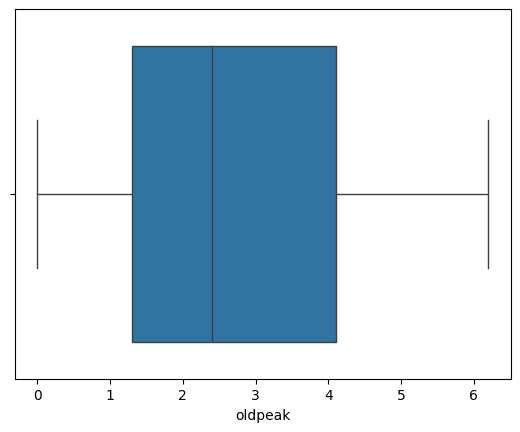

In [ ]:
sns.boxplot(x=df['oldpeak'])
plt.show()

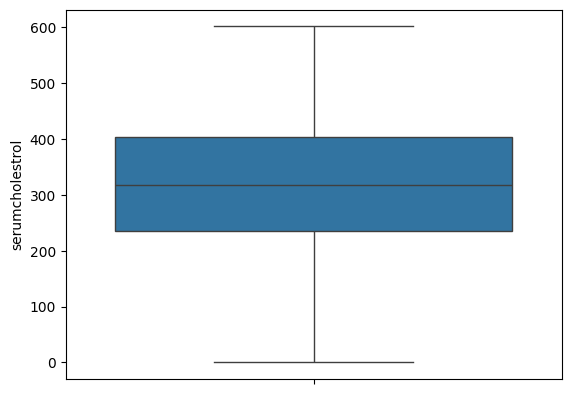

In [ ]:
sns.boxplot(y=df['serumcholestrol'])
plt.show()

Memeriksa anomali. Aturan data dilihat dari Cardiovascular_Disease_Dataset_

In [ ]:
# Memeriksa anomali : variabel age harus lebih dari 0
ano_age = df[df['age'] <= 0]
print(ano_age)

Empty DataFrame
Columns: [age, chestpain, restingBP, serumcholestrol, fastingbloodsugar, restingrelectro, maxheartrate, exerciseangia, oldpeak, slope, noofmajorvessels, target]
Index: []


In [ ]:
# Memeriksa anomali : variabel chestpain harus 0, 1, 2, atau 3
df['chestpain'].unique()

array([2, 0, 1, 3])

In [ ]:
# Memeriksa anomali : variabel restingbp harus ada di range 94-200
ano_restingbp = df[~df['restingBP'].between(94,200)]
ano_rbp = len(ano_restingbp)
ano_rbp

0

In [ ]:
# Memeriksa anomali : variabel serumcholestrol harus ada di range 126 - 564
#df['ano_serumcholestrol']= (df['serumcholestrol'] < 126) | (df['serumcholestrol'] > 564)
#df['ano_serumcholestrol'].sum()
ano_serumcholestrol = df[~df['serumcholestrol'].between(126,564)]
ano_sc = len(ano_serumcholestrol)
ano_sc

65

In [ ]:
# Memeriksa anomali : variabel fastingbloodsugar harus 0 atau 1
df['fastingbloodsugar'].unique()

array([0, 1])

In [ ]:
# Memeriksa anomali : variabel restingrelectro harus 0, 1, atau 2
df['restingrelectro'].unique()

array([1, 0, 2])

In [ ]:
# Memeriksa anomali : variabel maxheartrate harus ada di range 71 - 202
ano_maxheartrate = df[~df['maxheartrate'].between(71,202)]
ano_mhr = len(ano_maxheartrate)
ano_mhr


0

In [ ]:
# Memeriksa anomali : variabel exerciseangia harus 0 atau 1
df['exerciseangia'].unique()

array([0, 1])

In [ ]:
# Memeriksa anomali : variabel oldpeak harus ada di range 0 - 6,2
ano_oldpeak = df[~df['oldpeak'].between(0,6.2)]
ano_op = len(ano_oldpeak)
ano_op

0

In [ ]:
# Memeriksa anomali : variabel slope harus 1, 2, atau 3
df['slope'].unique()

array([3, 1, 2, 0])

In [ ]:
# Memeriksa anomali : variabel noofmajorvessels harus 0, 1, 2, atau 3
df['noofmajorvessels'].unique()

array([3, 1, 0, 2])

In [ ]:
# Memeriksa anomali : variabel target harus 0 atau 1
df['target'].unique()

array([1, 0])

Data yang tidak sesuai dengan aturan dataset akan di replace dengan nilai mean atau modus dari kolom data tersebut

In [ ]:
# Mengeluarkan nilai mean variabel serumcholestrol
mean_sc = df['serumcholestrol'].mean()
mean_sc

311.447

In [ ]:
# Mengganti nilai anomaly dari variabel serumcholsetrol
index_to_replace_sc = ano_serumcholestrol.index
df.loc[index_to_replace_sc, 'serumcholestrol'] = mean_sc
ano_serumcholestrol = df[~df['serumcholestrol'].between(126,564)]
ano_sc = len(ano_serumcholestrol)
ano_sc

0

In [ ]:
#df['serumcholestrol'].min()
df['restingBP'].min()

94

In [ ]:
# Mengeluarkan nilai modus variabel slope
mode_slope = df['slope'].mode()[0]
mode_slope

2

In [ ]:
# Mengganti nilai anomaly dari variabel slope
df['slope'] = df['slope'].replace(0, mode_slope)
df['slope'].unique()

array([3, 1, 2])

###Normalisasi Data
Normalisasi data untuk mengurangi data yang terlalu dominan karena rentangnya terlalu besar


In [ ]:
# Normalisasi data
from sklearn.preprocessing import MinMaxScaler
x = df[['serumcholestrol', 'restingBP','maxheartrate']]
min_max_scaler = MinMaxScaler()
min_max_res = min_max_scaler.fit_transform(x)
df[['serumcholestrol', 'restingBP','maxheartrate']] = min_max_scaler.fit_transform(x)
print(df.head())


   age  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0   53          2   0.726415         0.418291                  0   
1   40          0   0.000000         0.226107                  0   
2   49          2   0.367925         0.023310                  0   
3   43          0   0.415094         0.379953                  1   
4   31          1   0.990566         0.418291                  0   

   restingrelectro  maxheartrate  exerciseangia  oldpeak  slope  \
0                1      0.580153              0      5.3      3   
1                1      0.335878              0      3.7      1   
2                0      1.000000              1      5.0      1   
3                1      0.625954              0      3.2      2   
4                2      0.496183              0      5.3      3   

   noofmajorvessels  target  
0                 3       1  
1                 1       0  
2                 0       0  
3                 2       1  
4                 2       1  


In [ ]:
df['restingBP'].min()

0.0

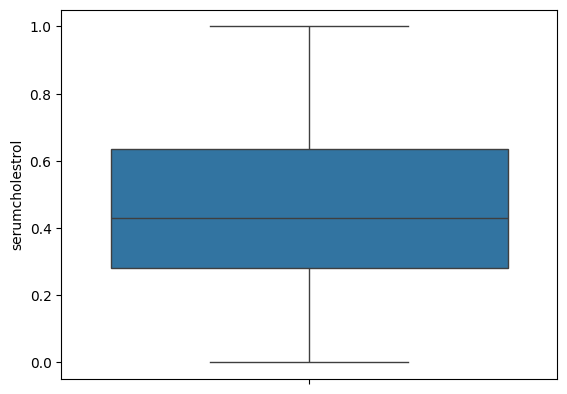

In [ ]:
sns.boxplot(y=df['serumcholestrol'])
plt.show()

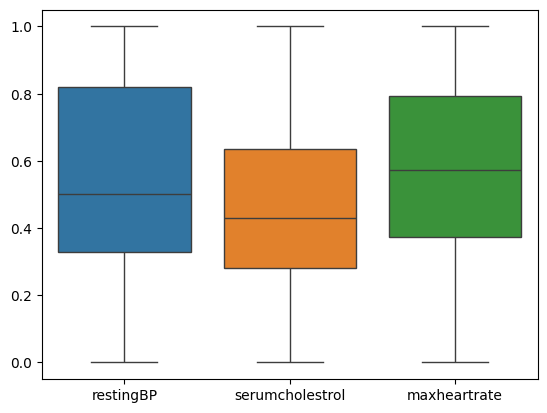

In [ ]:
# Boxplot after Feature Engineering
sns.boxplot(data=df[['restingBP', 'serumcholestrol', 'maxheartrate']])
plt.show()

- The three variables are now adjusted to  between 0 and 1.
- Their shapes like spread and quartiles are the same as before, but now they are on the same scale.
- This makes all variables equally important in machine learning models, avoiding bias caused by large numbers.

### Data Understanding
Data visualization untuk melihat keterkaitan atau hubungan antar variabel


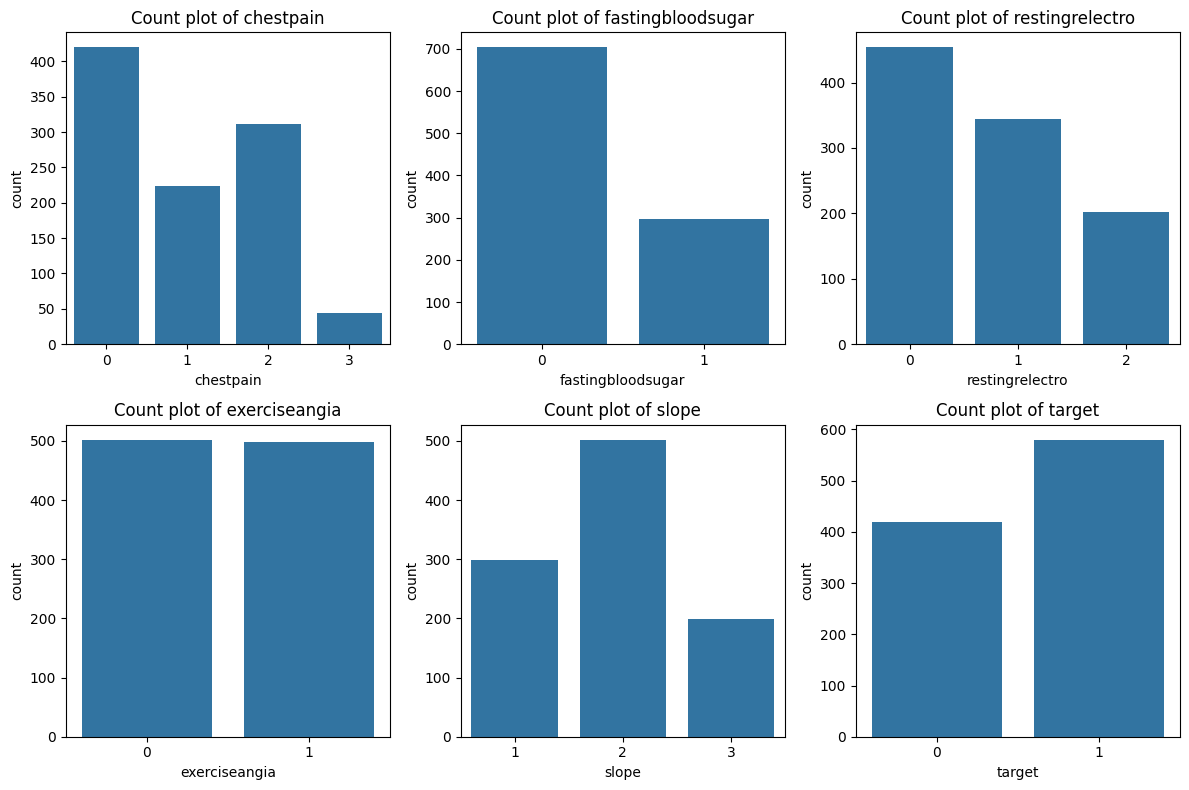

In [ ]:
# melihat distribusi data dari setiap variabel
category = ['chestpain','fastingbloodsugar','restingrelectro','exerciseangia','slope','target']
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(category):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count plot of {col}')

plt.tight_layout()
plt.show()

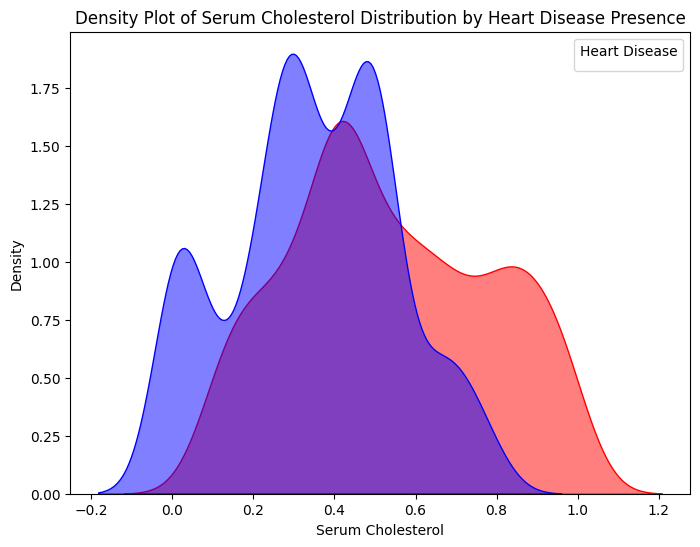

In [ ]:
# Buat density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='serumcholestrol', hue='target', fill=True, alpha=0.5,
             palette={0: 'blue', 1: 'red'}, common_norm=False)

# Set label dan judul
plt.title("Density Plot of Serum Cholesterol Distribution by Heart Disease Presence")
plt.xlabel("Serum Cholesterol")
plt.ylabel("Density")

# customize legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Absence', 'Presence'], title='Heart Disease')

# menampilkan plot
plt.show()


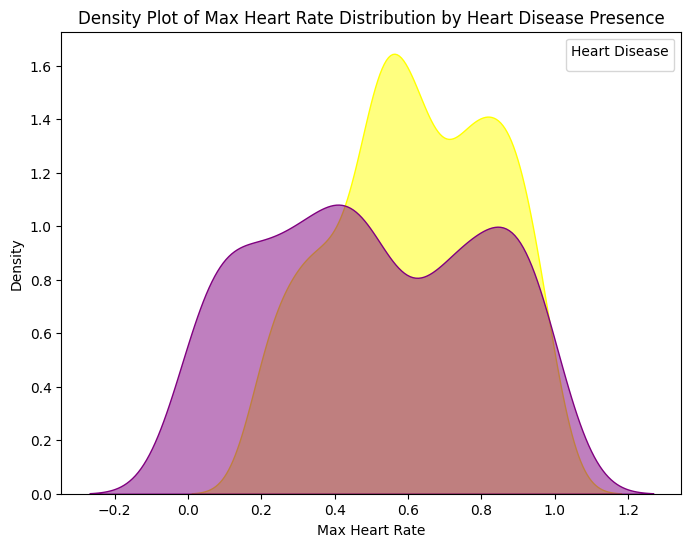

In [ ]:
# buat density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='maxheartrate', hue='target', fill=True, alpha=0.5,
             palette={0: 'purple', 1: 'yellow'}, common_norm=False)

# Set label dan judul
plt.title("Density Plot of Max Heart Rate Distribution by Heart Disease Presence")
plt.xlabel("Max Heart Rate")
plt.ylabel("Density")

# Customize legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Absence', 'Presence'], title='Heart Disease')

# Menampilkan plot
plt.show()


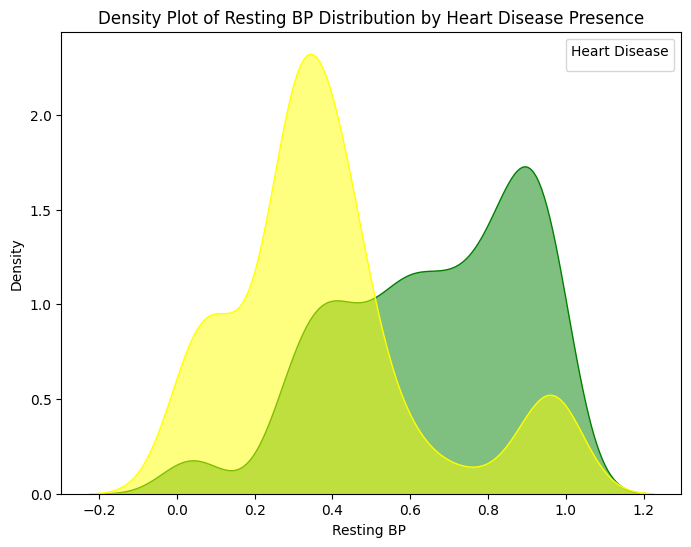

In [ ]:
# Buat density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x = 'restingBP', hue='target', fill=True, alpha=0.5,
             palette={0: 'yellow', 1: 'green'}, common_norm=False)

# Set label dan judul
plt.title("Density Plot of Resting BP Distribution by Heart Disease Presence")
plt.xlabel("Resting BP ")
plt.ylabel("Density")

# Customize legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Absence', 'Presence'], title='Heart Disease')

# Menampilkan plot
plt.show()


<Axes: >

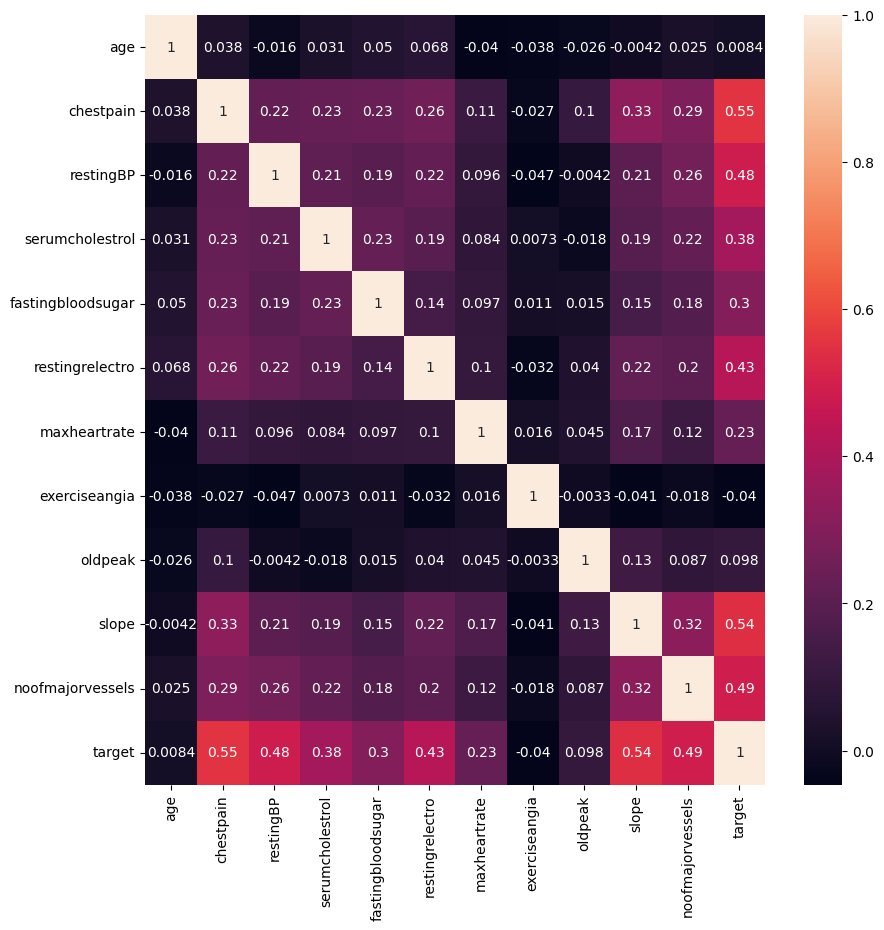

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df

,age,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,2,0.726415,0.418291,0,1,0.580153,0,5.3,3,3,1
1,40,0,0.000000,0.226107,0,1,0.335878,0,3.7,1,1,0
2,49,2,0.367925,0.023310,0,0,1.000000,1,5.0,1,0,0
3,43,0,0.415094,0.379953,1,1,0.625954,0,3.2,2,2,1
4,31,1,0.990566,0.418291,0,2,0.496183,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,48,2,0.424528,0.505828,0,2,0.854962,1,5.6,2,2,1
996,47,3,0.462264,0.293706,1,1,0.206107,1,5.7,1,0,0
997,69,0,0.584906,0.703963,1,0,0.954198,0,1.4,3,1,1
998,45,1,0.867925,0.664336,0,1,0.351145,1,5.9,3,2,1


After doing normalization data, each variabel has a similar range of Above is the final data that is scaled for model training.

# Model Training: Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
x, y = df.drop(columns='target'), df.target

# Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
y_binary = (y > np.mean(y)).astype(int)


In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
	x, y_binary, test_size=0.3, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversampled, y_train_oversampled = oversample.fit_resample(x_train, y_train)

In [ ]:
# Standardize features
scaler = StandardScaler()
x_train_oversampled = scaler.fit_transform(x_train_oversampled)
x_test = scaler.transform(x_test)

In [ ]:
# Train the Logistic Regression model
model_LR = LogisticRegression(random_state=42)
model_LR.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Evaluate the model
y_pred_LR = model_LR.predict(x_test)
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_LR * 100))

Logistic Regression Accuracy: 59.33%


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_LR))


Classification Report

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       138
           1       1.00      0.25      0.40       162

    accuracy                           0.59       300
   macro avg       0.77      0.62      0.54       300
weighted avg       0.78      0.59      0.53       300



In [ ]:
# Train the Logistic Regression model with Oversampled Data
model_LR = LogisticRegression(random_state=42)
model_LR.fit(x_train_oversampled, y_train_oversampled)


LogisticRegression(random_state=42)

In [ ]:
# Evaluate the model with Oversampled Data
y_pred_LR = model_LR.predict(x_test)
accuracy_LR = accuracy_score(y_test, y_pred_LR)

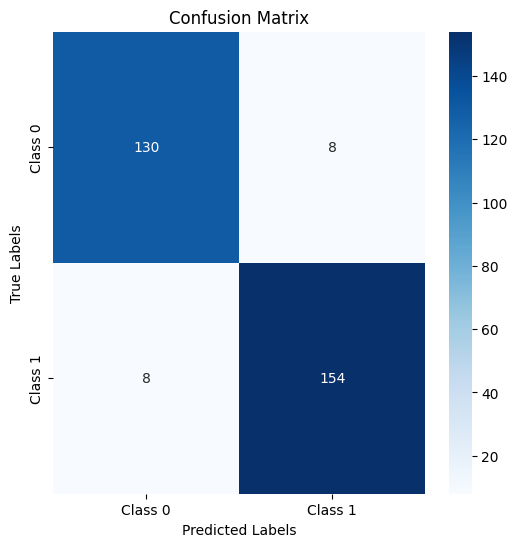

In [ ]:
from sklearn.metrics import confusion_matrix

cm_LR = confusion_matrix(y_test, y_pred_LR)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_LR, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Confusion Matrix for Logistic Regression:
*  True Positive: 130
*  False Positive: 8
*  True Negative: 154
*  False Negative: 8

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_LR))
print()
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_LR * 100))


Classification Report

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       138
           1       0.95      0.95      0.95       162

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300


Logistic Regression Accuracy: 94.67%


Above is the Classification Report for Logistic Regression. The label 0 is for absence of heart disease. The label 1 is for presence of heart disease.

# Model Training: Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Standardize features
DT_class = DecisionTreeClassifier(random_state=42)
DT_class.fit(x_train, y_train)
y_predict_DT = DT_class.predict(x_test)

In [ ]:
accuracy_score(y_test, y_predict_DT)

0.9033333333333333

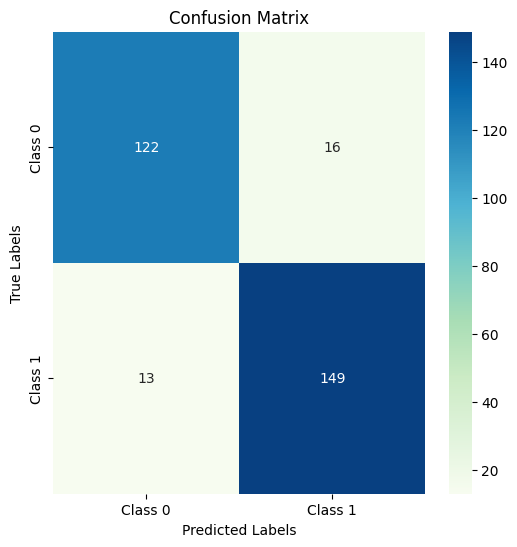

In [ ]:
cm_DT = confusion_matrix(y_test, y_predict_DT)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_DT, annot=True, fmt='d', cmap='GnBu', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Confusion Matrix for Decision Tree:
*  True Positive: 122
*  False Positive: 16
*  True Negative: 149
*  False Negative: 13

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_DT, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       138
           1       0.90      0.92      0.91       162

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



Above is the Classification Report for Decision Tree. The label 0 is for absence of heart disease. The label 1 is for presence of heart disease. From the classification report and the confusion matrix, it can be seen that the accuracy is a bit low and has a lot of false label. Therefore, we standardize feature and do hyperparameter tuning for better accuracy.

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversampled, y_train_oversampled = oversample.fit_resample(x_train, y_train)

In [ ]:
# Standardize features
DT_class = DecisionTreeClassifier(random_state=42)
DT_class.fit(x_train_oversampled, y_train_oversampled)
y_predict_DT = DT_class.predict(x_test)

In [ ]:
accuracy_score(y_test, y_predict_DT)

0.9066666666666666

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_DT, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       138
           1       0.95      0.88      0.91       162

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8,10],
}

In [ ]:
DT_class2 = DecisionTreeClassifier()
DT_class2 = GridSearchCV(DT_class2 ,
                            param_grid = parameters,
                            scoring='accuracy',
                            cv=10)

DT_class2.fit(x_train_oversampled, y_train_oversampled)
print("Tuned Hyperparameters :", DT_class2.best_params_)
print("Accuracy :", DT_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 8}
Accuracy : 0.909136546184739


In [ ]:
DT_class_best = DecisionTreeClassifier(criterion='log_loss', max_depth=10, random_state=42)
DT_class_best.fit(x_train_oversampled, y_train_oversampled)

DecisionTreeClassifier(criterion='log_loss', max_depth=10, random_state=42)

In [ ]:
y_predict_best = DT_class_best.predict(x_test)

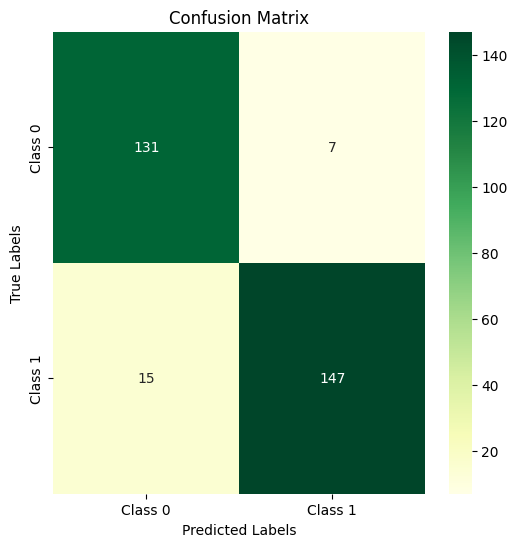

In [ ]:
cm_DTBest = confusion_matrix(y_test, y_predict_best)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_DTBest, annot=True, fmt='d', cmap='YlGn', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Confusion Matrix for Decision Tree after feature standardization and hyperparamete tuning:
*  True Positive: 131
*  False Positive: 7
*  True Negative: 147
*  False Negative: 15

In [ ]:
# Evaluate the model
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['0','1']))
print()
accuracy_DT = accuracy_score(y_test, y_predict_best)
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_DT * 100))


Classification Report

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       138
           1       0.95      0.91      0.93       162

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300


Decision Tree Accuracy: 92.67%


Above is the Classification Report for Decision Tree after standardize feature and hypertuning. The label 0 is for absence of heart disease. The label 1 is for presence of heart disease. Hypertuning and feature standardization improved the accuracy.   

# Model Training: Random Forest

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# load dataset
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
x = df.drop(columns='target')
y = df['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversampled, y_train = oversample.fit_resample(x_train, y_train)

In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, None],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(x_train_oversampled, y_train)

best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'n_estimators': 100}


In [ ]:
model_RF = RandomForestClassifier(random_state=42)

In [ ]:
model_RF.fit(x_train_oversampled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_RF = model_RF.predict(x_test)

In [ ]:
y_predicts_best = y_pred_RF

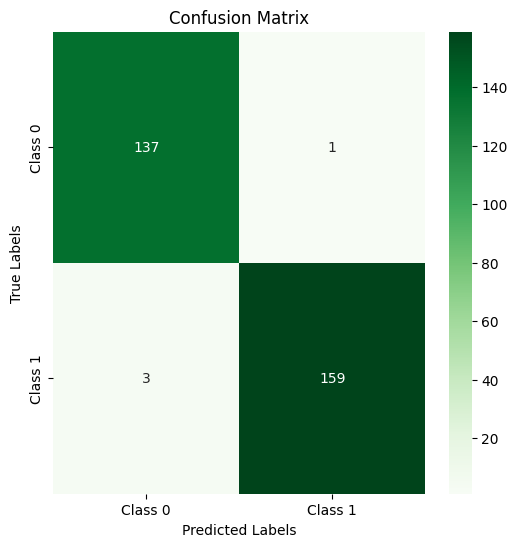

In [ ]:
cm_RF = confusion_matrix(y_test, y_predicts_best)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_RF, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Confusion Matrix for Random Forest after hyperparamete tuning:
*  True Positive: 137
*  False Positive: 1
*  True Negative: 159
*  False Negative: 3

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_RF, target_names=['0', '1']))
print()
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Random Forest Accuracy: {:.2f}%".format(accuracy_RF * 100))


Classification Report

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       138
           1       0.99      0.98      0.99       162

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Random Forest Accuracy: 98.67%


Above is the Classification Report for Decision Tree after hypertuning. The label 0 is for absence of heart disease. The label 1 is for presence of heart disease.

# RESULT ANALYSIS


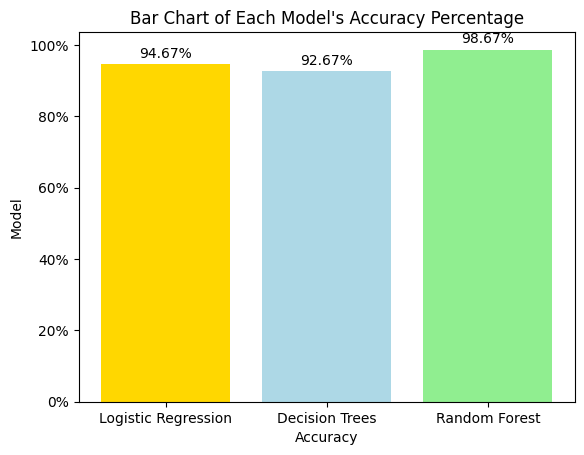

In [ ]:
from matplotlib.ticker import PercentFormatter
model_names = ['Logistic Regression', 'Decision Trees', 'Random Forest']
percentages = [accuracy_LR*100, accuracy_DT*100, accuracy_RF*100]
plt.bar(model_names, percentages, color=['gold', 'lightblue', 'lightgreen'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)
plt.title('Bar Chart of Each Model\'s Accuracy Percentage')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

After extensive coding and hyperparameter tuning, we obtained the final results for each model. Logistic Regression achieved an accuracy of 94.67%, while the Decision Tree had the lowest accuracy at 93%. The best performance was from the Random Forest model, with an accuracy of 99%. Precision, recall, and F1 scores are shown in the poster. These results are likely influenced by overfitting and the complexity of the data. Decision Trees are prone to overfitting, especially it it's too complex, while Logistic Regression struggles with non-linear relationships. As for Random Forest, our top model, it is an ensemble method that combines multiple decision trees, each trained on different data subsets. It makes predictions by aggregating the results of all trees, using majority vote for classification or averaging for regression.


# CONCLUSION
This project composed of extensive data analysis, feature engineering, and variation of model training. The model used are Logistic Regression, Decision Tree, and Random Forest. From the trainings, Random Forest is proven to give the best performance for heart disease detection with 99% of accuracy. This project delivers a highly accurate predictive model for the early detection and prevention of heart disease, supporting initiatives to enhance heart health and lower cardiovascular risks.